<a href="https://colab.research.google.com/github/basmasaidi00/crud/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d ahmedaliraja/customer-satisfaction-10k -p /content/datasets

Dataset URL: https://www.kaggle.com/datasets/ahmedaliraja/customer-satisfaction-10k
License(s): other
  0% 0.00/33.4k [00:00<?, ?B/s]
100% 33.4k/33.4k [00:00<00:00, 58.2MB/s]


In [48]:
!unzip /content/datasets/customer-satisfaction-10k.zip

Archive:  /content/datasets/customer-satisfaction-10k.zip
replace Customer-survey-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Importer les bibliothèques

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix


In [50]:
df = pd.read_csv("Customer-survey-data.csv")
print(df.head())

   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                                              

# Supprimer les lignes contenant des valeurs manquantes

In [51]:
df = df.dropna()

# Separation des features et target

In [52]:
X = df.drop(columns=['Customer', 'Was your order accurate? Please respond yes or no.'])
y = df['Was your order accurate? Please respond yes or no.']

# Normalisation des données

In [53]:
#  Normaliser les valeurs numériques
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ensembles d'entraînement et de test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données

In [20]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

#1.Entrainement du modèle Régression Logistique

In [55]:
#  Construire un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
#   Évaluer le modèle à l'aide de la matrice de confusion
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
print("y_pred=",y_pred)
print("conf_matrix=",conf_matrix)

y_pred= ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
conf_matrix= [[   0  537]
 [   0 1323]]


In [58]:
#Mesurer la précision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')

print(f"Précision : {accuracy}")

Précision : 0.7112903225806452


# 2.Entraînement du modèle KNN

In [59]:
# Construire un modèle KNN
k = 5  # nombre de voisins à considérer
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# Evaluer le modèle à l'aide de la matrice de confusion
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("y_pred=",y_pred)
print("conf_matrix=",conf_matrix)

y_pred= ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
conf_matrix= [[  89  448]
 [ 175 1148]]


Validation croisée pour trouver la meilleure valeur de K

In [61]:
# Définir les valeurs de K à tester
k_values = np.arange(1, 21)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    # Créer le classificateur KNN avec la valeur de K actuelle
    knn_cv = KNeighborsClassifier(n_neighbors=k)

    # Calculer les scores de validation croisée
    scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

    # Calculer la moyenne des scores
    cv_scores.append(scores.mean())

# Trouver la meilleure valeur de K et le meilleur score
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)

print("Meilleure valeur de K:", best_k)
print("Meilleur score de validation croisée:", best_score)

Meilleure valeur de K: 15
Meilleur score de validation croisée: 0.70875282917905


In [63]:
#Mesurer la précision, le rappel et le score F1 du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')

print(f"Précision : {accuracy}")


Précision : 0.6650537634408602


# 3.Entraînement du modèle SVM



In [22]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_1, y_train)

SVC(kernel='linear', random_state=42)

# Prédiction et évaluation du modèle

In [24]:
y_pred = svm_model.predict(X_test_1)
#Score
score = accuracy_score(y_test, y_pred)
print("Score:", score)
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", conf_matrix)

Score: 0.7112903225806452
Matrice de Confusion :
 [[   0  537]
 [   0 1323]]


#4.Entrainement du modèle arbre de décision

In [26]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

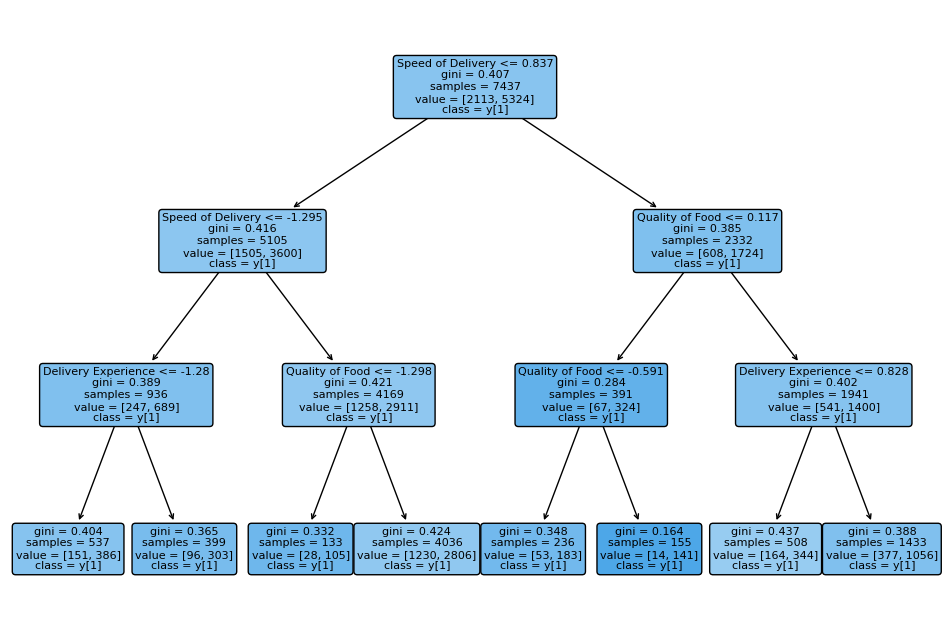

In [27]:
#visualiserl l'arbre de décision
plt.figure(figsize=(12,8))
tree_plot = plot_tree(clf, filled=True, feature_names=['Delivery Experience', 'Quality of Food', 'Speed of Delivery'], class_names=True, rounded=True, fontsize=8)
plt.show()

Evaluation du modèle

In [28]:
print("Model score: ",clf.score(X_test, y_test))

Model score:  0.7112903225806452


#5.Entrainement du modèle Réseau de Neurone

In [33]:
# Définir le modèle
model = Sequential()

# Ajouter des couches
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Utilisez 'softmax' pour une classification multiclasse

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Utilisez 'categorical_crossentropy' pour une classification multiclasse


In [35]:
# Assurez-vous que les données sont des tableaux NumPy
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

# Vérifiez les types de données
print(X_train.dtype, y_train.dtype)

# Assurez-vous que y_train contient des valeurs numériques
print(np.unique(y_train))

# Si y_train contient des catégories, encodez-les en numériques
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Vérifiez à nouveau les valeurs uniques après encodage
print(np.unique(y_train))

# Maintenant, entraînez le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

float64 object
['No' 'Yes']
[0 1]
Epoch 1/50
595/595 [==============================] - 3s 3ms/step - loss: 0.6053 - accuracy: 0.7136 - val_loss: 0.5955 - val_accuracy: 0.7238
Epoch 2/50
595/595 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.7139 - val_loss: 0.5867 - val_accuracy: 0.7238
Epoch 3/50
595/595 [==============================] - 1s 2ms/step - loss: 0.5986 - accuracy: 0.7139 - val_loss: 0.5873 - val_accuracy: 0.7238
Epoch 4/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5982 - accuracy: 0.7139 - val_loss: 0.5907 - val_accuracy: 0.7238
Epoch 5/50
595/595 [==============================] - 3s 4ms/step - loss: 0.5977 - accuracy: 0.7139 - val_loss: 0.5846 - val_accuracy: 0.7238
Epoch 6/50
595/595 [==============================] - 1s 2ms/step - loss: 0.5973 - accuracy: 0.7139 - val_loss: 0.5854 - val_accuracy: 0.7238
Epoch 7/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5977 - accuracy: 0.7139 - val_loss: 0.

In [38]:
# Faire des prédictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Seulement si vous faites une classification binaire

# Afficher quelques prédictions
print(y_pred_classes[:10])

59/59 [==============================] - 0s 1ms/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Evalution du modèle

In [37]:
# Ensure NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Check data types
print(X_test.dtype, y_test.dtype)

# Ensure y_test contains numerical values
if isinstance(y_test[0], str):
  # Convert string labels to numerical values using LabelEncoder
  from sklearn.preprocessing import LabelEncoder
  label_encoder = LabelEncoder()
  y_test = label_encoder.fit_transform(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

float64 object
59/59 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7113
Loss: 0.5992751717567444
Accuracy: 0.7112902998924255



 Résumé de l'entraînement

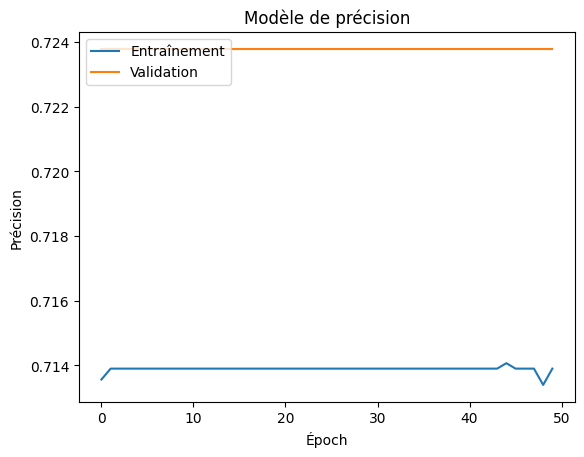

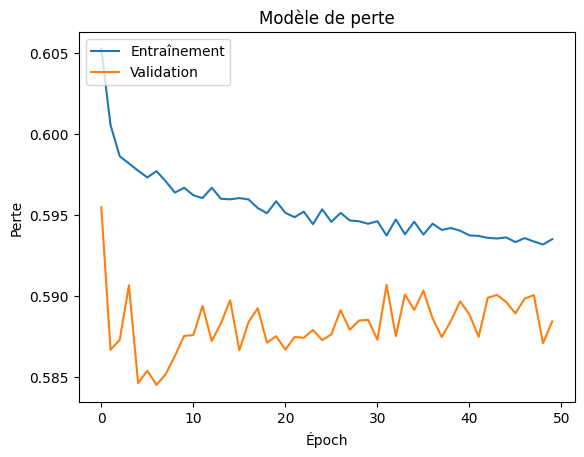

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modèle de précision')
plt.xlabel('Époch')
plt.ylabel('Précision')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modèle de perte')
plt.xlabel('Époch')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()